In [36]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [37]:
class EpsilonGreedyBandit:
    def __init__(self, n_arms, epsilon, steps, true_rewards):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.steps = steps
        self.true_rewards = true_rewards
        self.q_values = np.zeros(n_arms)
        self.action_counts = np.zeros(n_arms)
        self.total_rewards = 0
        self.reward_history = []

    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_arms)
        return np.argmax(self.q_values)

    def update_q_values(self, action, reward):
        self.action_counts[action] += 1
        self.q_values[action] += (reward - self.q_values[action]) / self.action_counts[action]

    def run(self):
        for _ in range(self.steps):
            action = self.select_action()
            reward = np.random.binomial(1, self.true_rewards[action])
            self.total_rewards += reward
            self.reward_history.append(self.total_rewards)
            self.update_q_values(action, reward)
        return self.total_rewards, self.reward_history

In [38]:
class UCBBandit:
    def __init__(self, n_arms, steps, true_rewards, c):
        self.n_arms = n_arms
        self.steps = steps
        self.true_rewards = true_rewards
        self.c = c
        self.q_values = np.zeros(n_arms)
        self.action_counts = np.zeros(n_arms)
        self.total_rewards = 0
        self.reward_history = []

    def select_action(self, t):
        if 0 in self.action_counts:
            return np.argmin(self.action_counts)
        ucb_values = self.q_values + self.c * np.sqrt(math.log(t + 1) / self.action_counts)
        return np.argmax(ucb_values)

    def update_q_values(self, action, reward):
        self.action_counts[action] += 1
        self.q_values[action] += (reward - self.q_values[action]) / self.action_counts[action]

    def run(self):
        for t in range(self.steps):
            action = self.select_action(t)
            reward = np.random.binomial(1, self.true_rewards[action])
            self.total_rewards += reward
            self.reward_history.append(self.total_rewards)
            self.update_q_values(action, reward)
        return self.total_rewards, self.reward_history

In [39]:
class ThompsonSamplingBandit:
    def __init__(self, n_arms, steps, true_rewards):
        self.n_arms = n_arms
        self.steps = steps
        self.true_rewards = true_rewards
        self.alpha = np.ones(n_arms)
        self.beta = np.ones(n_arms)
        self.total_rewards = 0
        self.reward_history = []

    def select_action(self):
        samples = np.random.beta(self.alpha, self.beta)
        return np.argmax(samples)

    def update_params(self, action, reward):
        if reward == 1:
            self.alpha[action] += 1
        else:
            self.beta[action] += 1

    def run(self):
        for _ in range(self.steps):
            action = self.select_action()
            reward = np.random.binomial(1, self.true_rewards[action])
            self.total_rewards += reward
            self.reward_history.append(self.total_rewards)
            self.update_params(action, reward)
        return self.total_rewards, self.reward_history

# Analysis:
# - Epsilon-Greedy: Balances exploration and exploitation, but performance depends on ε.
# - Lower epsilon values lead to higher exploitation but risk suboptimal choices.
# - UCB: Dynamically adjusts exploration based on uncertainty, often outperforming epsilon-greedy.
# - Thompson Sampling: Uses Bayesian updating to optimize exploration-exploitation trade-off.
# - UCB and Thompson Sampling typically outperform Epsilon-Greedy in terms of convergence speed.
# - Thompson Sampling tends to be more efficient in handling non-stationary environments.
# - Higher c-values encourage more exploration, which can be beneficial in non-stationary environments.
# - Comparing plots, UCB generally achieves a higher total reward over time due to its systematic exploration approach.


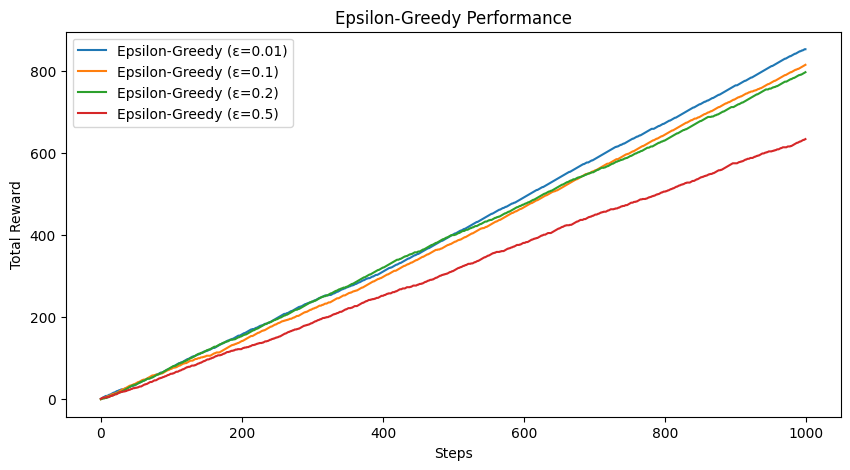

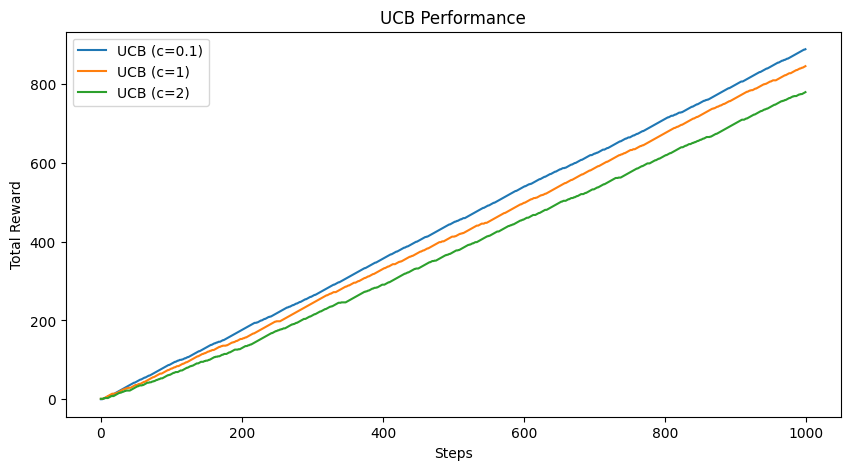

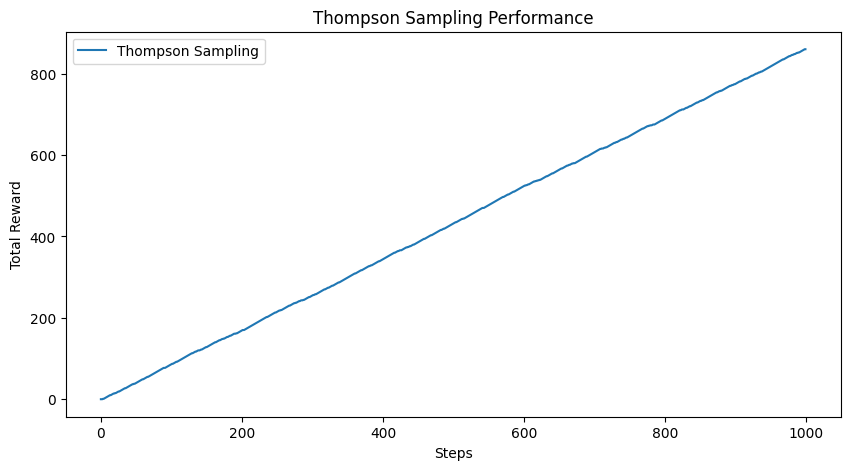

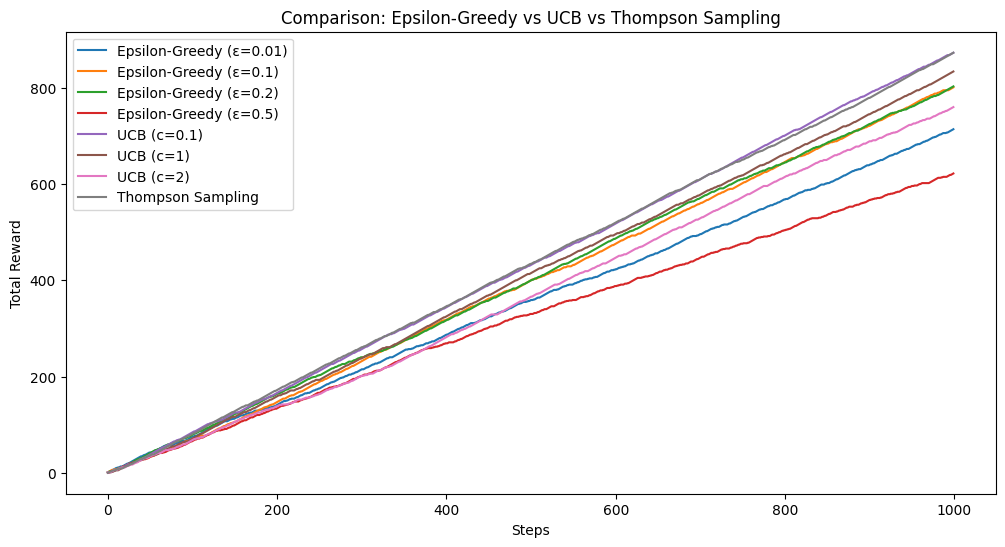

In [40]:
# Experiment function to run and plot results
def experiment():
    n_arms = 5
    steps = 1000
    true_rewards = np.random.rand(n_arms)
    epsilons = [0.01, 0.1, 0.2, 0.5]
    c_values = [0.1, 1, 2]

    # Epsilon-Greedy combined plot
    plt.figure(figsize=(10, 5))
    for epsilon in epsilons:
        bandit = EpsilonGreedyBandit(n_arms, epsilon, steps, true_rewards)
        _, reward_history = bandit.run()
        plt.plot(reward_history, label=f'Epsilon-Greedy (ε={epsilon})')
    plt.xlabel('Steps')
    plt.ylabel('Total Reward')
    plt.title('Epsilon-Greedy Performance')
    plt.legend()
    plt.show()

    # UCB combined plot
    plt.figure(figsize=(10, 5))
    for c in c_values:
        bandit = UCBBandit(n_arms, steps, true_rewards, c)
        _, reward_history = bandit.run()
        plt.plot(reward_history, label=f'UCB (c={c})')
    plt.xlabel('Steps')
    plt.ylabel('Total Reward')
    plt.title('UCB Performance')
    plt.legend()
    plt.show()

    # Thompson Sampling Plot
    bandit = ThompsonSamplingBandit(n_arms, steps, true_rewards)
    _, reward_history = bandit.run()
    plt.figure(figsize=(10, 5))
    plt.plot(reward_history, label='Thompson Sampling')
    plt.xlabel('Steps')
    plt.ylabel('Total Reward')
    plt.title('Thompson Sampling Performance')
    plt.legend()
    plt.show()

    # Comparison plot
    plt.figure(figsize=(12, 6))

    for epsilon in epsilons:
        bandit = EpsilonGreedyBandit(n_arms, epsilon, steps, true_rewards)
        _, reward_history = bandit.run()
        plt.plot(reward_history, label=f'Epsilon-Greedy (ε={epsilon})')

    for c in c_values:
        bandit = UCBBandit(n_arms, steps, true_rewards, c)
        _, reward_history = bandit.run()
        plt.plot(reward_history, label=f'UCB (c={c})')

    bandit = ThompsonSamplingBandit(n_arms, steps, true_rewards)
    _, reward_history = bandit.run()
    plt.plot(reward_history, label='Thompson Sampling')

    plt.xlabel('Steps')
    plt.ylabel('Total Reward')
    plt.title('Comparison: Epsilon-Greedy vs UCB vs Thompson Sampling')
    plt.legend()
    plt.show()

experiment()